In [1]:
#Lets first import all the nessessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [2]:
#Lets read the data in
df1=pd.read_csv ("LT_processed_data.csv")

In [3]:
df1.head()

,NewDCFlag,NewRegionFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsMainstream,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,ProjectCategory,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,False,missing,missing,Azure,Compute,missing,False,Not Mainstream,False,Asia Pacific,Growth,20,800.0,99-ZZ No Priority,Azure Compute APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,False,missing,missing,Azure,Storage,missing,False,Not Mainstream,False,Asia Pacific,Growth,20,280.0,99-ZZ No Priority,Azure Storage APAC,PRD,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,False,missing,missing,Azure,Compute,missing,False,Not Mainstream,False,Europe,Growth,20,800.0,99-ZZ No Priority,Azure Compute EMEA,PRD,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,False,missing,missing,Azure,XIO Compute,missing,False,Not Mainstream,False,United States,Growth,20,880.0,99-ZZ No Priority,Azure Compute US,PRD,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,False,False,missing,missing,Azure,Xtransport,missing,False,Not Mainstream,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,PRD,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0


In [4]:
#As per the observations in EDA, we are going to drop-IsMainstream,ProjectCategory,NewRegionFlag, since it contains a single catogory
df1.drop(["NewRegionFlag","IsMainstream","ProjectCategory"],axis=1,inplace=True)

In [5]:
#Since we already dealt with EDA and Feature Engineering, we will just check the summary
#Fuction to see the summary of the data
def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    #print("Total Columns in the Dataset:", df1.columns.nunique())
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing Values'] = df.isnull().sum().values
    summary['Uniques Values'] = df.nunique().values
  
    return summary

In [6]:
summary_table(df1)

Dataset Shape: (1124, 21)


,Name,dtypes,Missing Values,Uniques Values
0,NewDCFlag,bool,0,2
1,ColoReady At PlanReservationStart Flag,object,0,3
2,DeploymentSeverity,object,0,4
3,EngineeringGroup,object,0,6
4,PlanResourceTypeName,object,0,31
5,IsAddRack,object,0,3
6,IsFirstFootprint,bool,0,2
7,IsNPI,bool,0,2
8,PlanGEO,object,0,14
9,PlanIntentName,object,0,7


In [7]:
#Lets fix the datatypes of each feature (Convert Bool type as Object type)
bool_features_list= [feature for feature in df1.columns if df1[feature].dtype =="bool"]
bool_features_list

df1[bool_features_list] = df1[bool_features_list].astype('object')

In [19]:
categorical_features_list= [feature for feature in df1.columns if df1[feature].dtype =="object"]
aditional= ['SKU Avaliable Flag']
categorical_features_list=categorical_features_list+ aditional
categorical_features_list

['NewDCFlag',
 'ColoReady At PlanReservationStart Flag',
 'EngineeringGroup',
 'PlanResourceTypeName',
 'IsAddRack',
 'IsFirstFootprint',
 'IsNPI',
 'PlanGEO',
 'PlanIntentName',
 'PlanOrderPriorityName',
 'PlanPropertyGroupName',
 'Region',
 'RegionGroup',
 'RegionType',
 'SKUCategoryName',
 'SKU Avaliable Flag']

In [9]:
#Expect DeploymentSeverity feature, all other are nominal. Only DeploymentSeverity is Ordinal 
#So lets use Lable encoder for DeploymentSeverity

d = {'missing':5,'high':2, 'medium':3,'low':4 }
df1["DeploymentSeverity"] = df1["DeploymentSeverity"].replace(d)

In [20]:
df2=df1.copy()

In [21]:
df2.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,True,missing,5,Azure,Compute,missing,False,False,Asia Pacific,Growth,20,800.0,99-ZZ No Priority,Azure Compute APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,124.0,31.0
1,False,missing,5,Azure,Storage,missing,False,False,Asia Pacific,Growth,20,280.0,99-ZZ No Priority,Azure Storage APAC,Southeast Asia,Not Restricted,Hero,0,PreRack,126.0,42.0
2,True,missing,5,Azure,Compute,missing,False,False,Europe,Growth,20,800.0,99-ZZ No Priority,Azure Compute EMEA,West Europe,Not Restricted,Hero,0,PreRack,198.0,31.0
3,False,missing,5,Azure,XIO Compute,missing,False,False,United States,Growth,20,880.0,99-ZZ No Priority,Azure Compute US,West US,Not Restricted,Hub,0,PreRack,207.0,49.0
4,False,missing,5,Azure,Xtransport,missing,False,False,CHINA,Growth,1,14.0,99-ZZ No Priority,Rare_var,Rare_var,Restricted,Satellite,0,PreRack,737.0,49.0


In [22]:
#Lest label encode the catogorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2[categorical_features_list]=df2[categorical_features_list].apply(le.fit_transform)

In [23]:
df2.head()

,NewDCFlag,ColoReady At PlanReservationStart Flag,DeploymentSeverity,EngineeringGroup,PlanResourceTypeName,IsAddRack,IsFirstFootprint,IsNPI,PlanGEO,PlanIntentName,NumberOfRacks,NumberOfServers,PlanOrderPriorityName,PlanPropertyGroupName,Region,RegionGroup,RegionType,SKU Avaliable Flag,SKUCategoryName,CT Signal to LIve,CT Signal to Dock
0,1,2,5,0,7,2,0,0,1,1,20,800.0,2,2,13,0,0,0,0,124.0,31.0
1,0,2,5,0,24,2,0,0,1,1,20,280.0,2,8,13,0,0,0,0,126.0,42.0
2,1,2,5,0,7,2,0,0,5,1,20,800.0,2,3,18,0,0,0,0,198.0,31.0
3,0,2,5,0,26,2,0,0,13,1,20,880.0,2,4,19,0,1,0,0,207.0,49.0
4,0,2,5,0,30,2,0,0,3,1,1,14.0,2,14,11,2,2,0,0,737.0,49.0


In [152]:
#lets define our predictors and outcome (Target)
x=df2.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df2["CT Signal to LIve"]

In [25]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

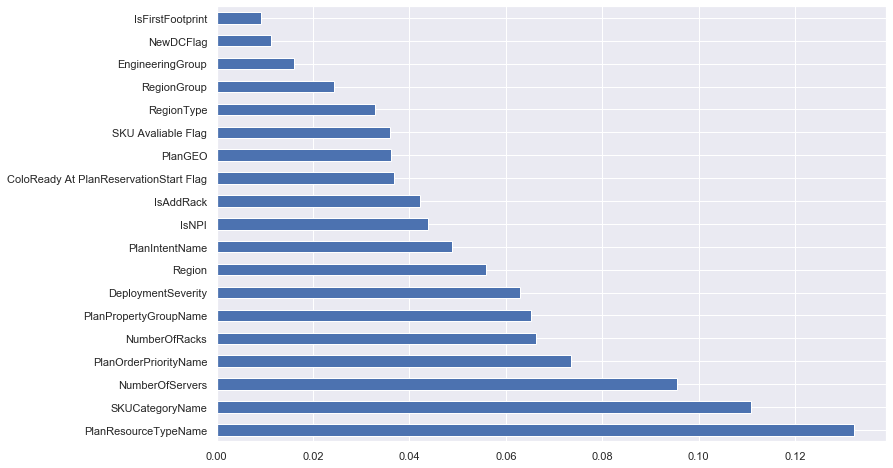

In [26]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [193]:
#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [28]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor() #lets keep all the parmeters to default as of now

In [30]:
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
#Predictions 
pred=RFR.predict(x_test)

In [32]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [97]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [47]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre) 

RMSE : 68.15184251759952
MAE: 46.32334855186797
r_square: 0.5422437585397755


In [84]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

for feature in zip (x.columns, importances):
    print (feature)

('NewDCFlag', 0.007936700966561388)
('ColoReady At PlanReservationStart Flag', 0.024267434886225302)
('DeploymentSeverity', 0.02930732803514045)
('EngineeringGroup', 0.010251474563886039)
('PlanResourceTypeName', 0.21679558741280022)
('IsAddRack', 0.025816503334700817)
('IsFirstFootprint', 0.013109680136854332)
('IsNPI', 0.019046342219929565)
('PlanGEO', 0.047032771862816604)
('PlanIntentName', 0.03480508725640733)
('NumberOfRacks', 0.03706448184090779)
('NumberOfServers', 0.16084516397400495)
('PlanOrderPriorityName', 0.0926883332909325)
('PlanPropertyGroupName', 0.060936573510376554)
('Region', 0.07802718503966498)
('RegionGroup', 0.02584428897867371)
('RegionType', 0.019549711705563803)
('SKU Avaliable Flag', 0.01549588435203432)
('SKUCategoryName', 0.08117946663251939)


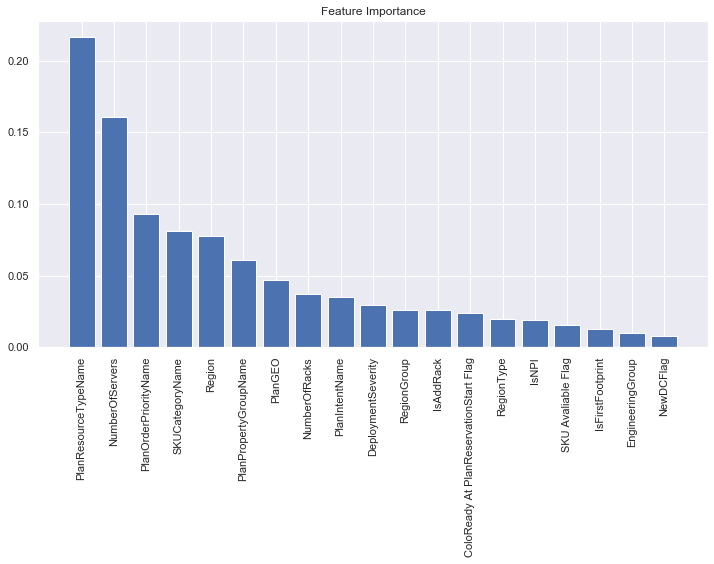

In [37]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [40]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7,8,None]
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [42]:
cv.best_params_

{'max_depth': None, 'n_estimators': 300}

In [85]:
#GridSearch Predictions
pred=cv.predict(x_test)

In [86]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre) 

RMSE : 83.33007891664396
MAE: 54.59537697796514
r_square: 0.3156430888641685


# Gradient Boosting

In [199]:
# Initialize and fit regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=100,loss="lad",max_depth=8)

In [200]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='lad', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [201]:
#Predictions
pred=gbr.predict(x_test)

In [204]:
G_pred=pd.DataFrame(pred)#For stack model

In [202]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [203]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 68.22319182205037
MAE: 44.72201481109841
r_square: 0.5412847914836285


In [53]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = GradientBoostingRegressor()
parameters = {
                'n_estimators': [100,200,300],
                'criterion' : ['mse','friedman_mse'],
                'max_depth' : [2,3,4,5,6,7,8,None],
                'loss' : ['ls', 'lad', 'huber']
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  9.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [54]:
cv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'lad',
 'max_depth': 8,
 'n_estimators': 100}

In [189]:
#GridSearch Predictions 
pred=cv.predict(x_test)

In [190]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 72.37721210254114
MAE: 50.4671452583749
r_square: 0.4837230066127879


# AdaBoost

In [102]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor(n_estimators=100,learning_rate=0.1,loss='exponential')

In [159]:
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='exponential',
                  n_estimators=100, random_state=None)

In [163]:
#Predictions
pred=abr.predict(x_test)

In [164]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [165]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 86.5228358656083
MAE: 69.65119422942175
r_square: 0.2621967533048367


In [89]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

adb1 = AdaBoostRegressor()
parameters = {
                'n_estimators': [100,200,300],
                'learning_rate' : [0.1,1],
                'loss' : ['linear', 'square', 'exponential']
               
}

cv = GridSearchCV(adb1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   17.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [90]:
cv.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

# Neural Neats-MLP

In [166]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(learning_rate='adaptive',hidden_layer_sizes=(100,))

In [167]:
mlp.fit(x_train,y_train)

C:\Users\Shrutee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [168]:
#Predictions
pred=mlp.predict(x_test)

In [169]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [170]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 92.99119557063689
MAE: 69.4448835059283
r_square: 0.14775839092729726


In [106]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

mlp1 = MLPRegressor()
parameters = {
                'hidden_layer_sizes': [(10,), (50,), (100,)],
                'activation': ['relu', 'tanh', 'logistic'],
                'learning_rate': ['constant', 'invscaling', 'adaptive']
               
}

cv = GridSearchCV(mlp1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   32.3s finished
C:\Users\Shrutee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...uffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['rel

In [107]:
cv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive'}

# Catboost 

In [139]:
#lets define our predictors and outcome (Target)
x1=df1.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y1=df1["CT Signal to LIve"]

In [140]:
#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=100)

In [205]:
from catboost import CatBoostRegressor
cr=CatBoostRegressor(iterations=200, loss_function='RMSE',
                              random_state = 2021, 
                              eval_metric="RMSE")

In [206]:
cr.fit(x_train, y_train,eval_set=(x_test, y_test),cat_features=categorical_features_list)

Learning rate set to 0.121598
0:	learn: 99.9555200	test: 97.5713430	best: 97.5713430 (0)	total: 23.5ms	remaining: 4.67s
1:	learn: 97.4697421	test: 95.5275636	best: 95.5275636 (1)	total: 49.8ms	remaining: 4.93s
2:	learn: 95.0142847	test: 93.7076224	best: 93.7076224 (2)	total: 73.5ms	remaining: 4.83s
3:	learn: 93.4642867	test: 92.3326077	best: 92.3326077 (3)	total: 93.5ms	remaining: 4.58s
4:	learn: 91.5160575	test: 90.7504402	best: 90.7504402 (4)	total: 122ms	remaining: 4.77s
5:	learn: 89.5351269	test: 88.6493423	best: 88.6493423 (5)	total: 148ms	remaining: 4.79s
6:	learn: 88.0300736	test: 87.1471588	best: 87.1471588 (6)	total: 171ms	remaining: 4.71s
7:	learn: 86.5762976	test: 85.4545192	best: 85.4545192 (7)	total: 197ms	remaining: 4.73s
8:	learn: 85.3221946	test: 84.2430744	best: 84.2430744 (8)	total: 224ms	remaining: 4.76s
9:	learn: 84.0939924	test: 82.6214983	best: 82.6214983 (9)	total: 251ms	remaining: 4.76s
10:	learn: 83.0353996	test: 81.7580592	best: 81.7580592 (10)	total: 284ms	re

91:	learn: 62.2780872	test: 71.1650817	best: 71.1627245 (87)	total: 2.5s	remaining: 2.93s
92:	learn: 62.0820613	test: 71.1619237	best: 71.1619237 (92)	total: 2.53s	remaining: 2.92s
93:	learn: 62.0405054	test: 71.1882614	best: 71.1619237 (92)	total: 2.56s	remaining: 2.88s
94:	learn: 61.6189300	test: 70.7404678	best: 70.7404678 (94)	total: 2.58s	remaining: 2.85s
95:	learn: 61.4502377	test: 70.7436156	best: 70.7404678 (94)	total: 2.62s	remaining: 2.84s
96:	learn: 61.0880370	test: 70.5749244	best: 70.5749244 (96)	total: 2.65s	remaining: 2.81s
97:	learn: 60.9764827	test: 70.5763654	best: 70.5749244 (96)	total: 2.69s	remaining: 2.8s
98:	learn: 60.6654100	test: 70.3668159	best: 70.3668159 (98)	total: 2.73s	remaining: 2.79s
99:	learn: 60.5791992	test: 70.3991660	best: 70.3668159 (98)	total: 2.76s	remaining: 2.76s
100:	learn: 60.5353601	test: 70.3917868	best: 70.3668159 (98)	total: 2.79s	remaining: 2.73s
101:	learn: 60.0389097	test: 70.3853663	best: 70.3668159 (98)	total: 2.82s	remaining: 2.71s

183:	learn: 51.3841026	test: 69.4960793	best: 69.4561554 (181)	total: 5.43s	remaining: 472ms
184:	learn: 51.2482615	test: 69.3749462	best: 69.3749462 (184)	total: 5.46s	remaining: 443ms
185:	learn: 51.2028802	test: 69.3812652	best: 69.3749462 (184)	total: 5.48s	remaining: 413ms
186:	learn: 51.1143186	test: 69.3825222	best: 69.3749462 (184)	total: 5.51s	remaining: 383ms
187:	learn: 51.1013553	test: 69.3858967	best: 69.3749462 (184)	total: 5.55s	remaining: 354ms
188:	learn: 50.8907991	test: 69.2965493	best: 69.2965493 (188)	total: 5.58s	remaining: 325ms
189:	learn: 50.8273331	test: 69.3356792	best: 69.2965493 (188)	total: 5.62s	remaining: 296ms
190:	learn: 50.6874990	test: 69.3604147	best: 69.2965493 (188)	total: 5.66s	remaining: 267ms
191:	learn: 50.6750554	test: 69.3607664	best: 69.2965493 (188)	total: 5.7s	remaining: 237ms
192:	learn: 50.5167262	test: 69.3364633	best: 69.2965493 (188)	total: 5.74s	remaining: 208ms
193:	learn: 50.3682409	test: 69.2654219	best: 69.2654219 (193)	total: 5

In [207]:
# Lets do predictions on out test data
pred=cr.predict(x_test)

In [210]:
C_pred=pd.DataFrame(pred)#For Stack model

In [208]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [209]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 69.2654218772129
MAE: 49.97743880744147
r_square: 0.52716236257831


In [125]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

cat1 = CatBoostRegressor()
parameters = {
                'iterations': [100,200,300,400],
                'loss_function': ['MAE', 'RMSE'],
                
               
}

cv = GridSearchCV(cat1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   17.6s finished


Learning rate set to 0.128652
0:	learn: 99.7963306	total: 2.36ms	remaining: 471ms
1:	learn: 96.7947794	total: 4.16ms	remaining: 412ms
2:	learn: 94.7062564	total: 6.07ms	remaining: 399ms
3:	learn: 92.4832250	total: 8.27ms	remaining: 405ms
4:	learn: 90.8472457	total: 9.55ms	remaining: 373ms
5:	learn: 88.8485585	total: 11.4ms	remaining: 368ms
6:	learn: 87.4469672	total: 13.1ms	remaining: 361ms
7:	learn: 86.1899461	total: 14.7ms	remaining: 354ms
8:	learn: 85.2997381	total: 16.4ms	remaining: 348ms
9:	learn: 84.3757012	total: 18.2ms	remaining: 346ms
10:	learn: 83.4266810	total: 19.8ms	remaining: 340ms
11:	learn: 82.5181897	total: 21.4ms	remaining: 336ms
12:	learn: 81.5820570	total: 23.1ms	remaining: 332ms
13:	learn: 81.1061263	total: 24.7ms	remaining: 328ms
14:	learn: 80.3783741	total: 26.3ms	remaining: 324ms
15:	learn: 80.0119237	total: 28ms	remaining: 322ms
16:	learn: 79.4678165	total: 29.7ms	remaining: 319ms
17:	learn: 78.8233464	total: 31.3ms	remaining: 316ms
18:	learn: 78.5208420	total:

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000000013625BA8>,
             iid='deprecated', n_jobs=-1,
             param_grid={'iterations': [100, 200, 300, 400],
                         'loss_function': ['MAE', 'RMSE']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [126]:
cv.best_params_

{'iterations': 200, 'loss_function': 'RMSE'}

# KNN

In [178]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(algorithm='ball_tree')

In [179]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [180]:
pred=knn.predict(x_test)

In [181]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [182]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 84.9186682274465
MAE: 58.17153024911032
r_square: 0.28930146487758657


In [176]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

knn1 = KNeighborsRegressor()
parameters = {
                'n_neighbors': [5,7,10,12],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
                
               
}

cv = GridSearchCV(knn1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [177]:
cv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 5}

# Stack Model 

Lest stack Two models 1. Gradient Boosting 2. CatBoosting 
And meta estimator- Random Forest 

This is a special method where we first segment the dataset as training and testing portions.Then we use the training set to train multiple regressors(base learners) and obtain their predictions made on the test set. Then we stack the predicted columns vertically which we consider as features while having the actual values of these samples in the last column as targets.Now we have created a new dataset which we give to another Regressor(meta learner) to identify patterns/relationships between predictions and actual values.

In [254]:
# Now Lets concat the 2 prediction datafreames and one Actual data frame
actual=pd.DataFrame(y_test)

In [255]:
actual.to_csv("True.csv",index=0,columns=actual.columns)

In [235]:
G_pred.columns=["Prediction1"]
C_pred.columns=["Prediction2"]

In [256]:
sd=pd.read_csv("priction_join.csv")

In [258]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prediction1        281 non-null    float64
 1   Prediction2        281 non-null    float64
 2   CT Signal to LIve  281 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.7 KB


In [295]:
#Lets define X and Y
x=sd.drop("CT Signal to LIve",axis=1)
y=sd["CT Signal to LIve"]

In [296]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [297]:
stacker= RandomForestRegressor(n_estimators=100,max_depth=5)

In [298]:
stacker.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [299]:
stcker_pred=stacker.predict(x_test)

In [300]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, stcker_pred))
MAE = mean_absolute_error(y_test, stcker_pred)
r_squre= r2_score(y_test, stcker_pred)

In [301]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 64.91372953121493
MAE: 46.04718933426568
r_square: 0.5468659936262875


In [271]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7,8,None]
}

cv = GridSearchCV(rf, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   54.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [272]:
cv.best_params_

{'max_depth': 5, 'n_estimators': 100}